In [37]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score

np.random.seed(42)

In [2]:
# Import data

dftrain = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds5_train.csv")
dftest = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds5_test.csv")
dfvalid = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds5_valid.csv")

In [3]:
dftrain.head(5)

,x_1,y
0,-4.029750,-0.420076
1,-2.524577,0.205268
2,2.794617,0.773794
3,1.695904,0.210476
4,-1.458392,0.858475


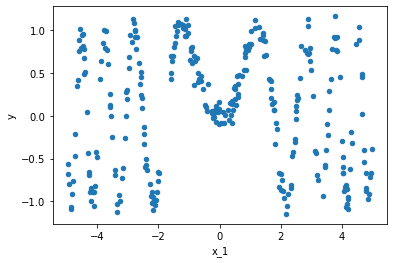

In [5]:
fig, ax = plt.subplots()
sc = dftrain.plot.scatter(x='x_1', y='y', ax=ax)

In [ ]:
# from pandas.plotting import scatter_matrix
# df = pd.DataFrame(np.random.randn(1000, 4), columns = ['a', 'b', 'c', 'd'])
axes = pd.plotting.scatter_matrix(dftrain, alpha = 0.2, figsize = (9, 9), range_padding = 0.15) # , diagonal = 'kde')

In [13]:
y_train = dftrain["y"]
X_train = dftrain[["x_1"]]

# y_test = dftest["y"]
# X_test = dftest[["x_1"]]

y_test = dfvalid["y"]
X_test = dfvalid[["x_1"]]

# y = pd.concat([y_train,y_test])
# X = pd.concat([X_train,X_test])

In [82]:
X_train["x_1"].to_numpy()

array([-4.02975001, -2.52457661,  2.7946174 ,  1.69590357, -1.45839187,
        0.8368018 ,  4.04012671,  1.94672233, -2.57638118,  1.69435277,
        4.55563078, -1.57818748,  3.57525896,  4.31427256, -3.87303135,
        2.64900274,  2.15802899,  4.00870375, -1.12401711,  4.15225061,
       -2.16654758, -4.41524444, -0.69531647, -3.77755514, -2.39641247,
       -2.16684545, -2.58082722, -1.20611524,  1.27583294, -3.04415956,
        1.0424325 ,  4.12796076, -4.46018687,  2.8905592 ,  2.45490456,
       -4.7127504 ,  0.51957597,  0.56013706,  4.03762218,  0.80501729,
       -1.4104053 ,  3.92839263, -3.28085468, -2.21347344, -4.10388627,
       -4.25358892,  0.15129022, -3.34913648,  4.88992336, -0.590472  ,
       -1.13893305,  4.72748296, -2.95375387,  4.80132641, -2.18396468,
        0.40361877, -1.96198188,  0.03489408,  4.8688271 ,  2.56511373,
        3.77284205,  1.68097838, -2.62247588,  2.52371987,  3.46571777,
       -2.24212009, -1.35269546,  0.85549194,  3.54076408,  0.43

In [84]:
pred_train

array([[-4.96016153e+00, -1.88353946e-01],
       [-4.94689690e+00, -1.86511119e-01],
       [-4.90907948e+00, -1.81257938e-01],
       [-4.86442531e+00, -1.75056251e-01],
       [-4.85516391e+00, -1.73770128e-01],
       [-4.83554224e+00, -1.71045373e-01],
       [-4.79785374e+00, -1.65811849e-01],
       [-4.72221042e+00, -1.55305383e-01],
       [-4.71275040e+00, -1.53990951e-01],
       [-4.66003131e+00, -1.46662615e-01],
       [-4.64073781e+00, -1.43978986e-01],
       [-4.59313342e+00, -1.37352577e-01],
       [-4.57811784e+00, -1.35260825e-01],
       [-4.55026732e+00, -1.31378834e-01],
       [-4.53807806e+00, -1.29678851e-01],
       [-4.48293367e+00, -1.21980500e-01],
       [-4.46971493e+00, -1.20133242e-01],
       [-4.46018687e+00, -1.18801286e-01],
       [-4.43289536e+00, -1.14984067e-01],
       [-4.41770179e+00, -1.12857682e-01],
       [-4.41524444e+00, -1.12513684e-01],
       [-4.39790006e+00, -1.10085056e-01],
       [-4.34684992e+00, -1.02930926e-01],
       [-4.

In [96]:
# reg = KernelRidge(kernel='polynomial', degree=4) # Lasso()

# from statsmodels.api.nonparametric import lowess
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

for clf in (reg,):
    # clf.fit(X_train, y_train)
    
    # y_pred = clf.predict(X_test)
    # print(reg.__class__.__name__, accuracy_score(y_test, y_pred))
    # print(clf.score(X_test, y_pred))
    # test = pd.concat([y_pred,X_test], axis=1)
    
    # pred_train = clf.predict(X_train)
    pred_train = lowess(y_train.to_numpy(), X_train["x_1"].to_numpy(), return_sorted=False)
    dfpred_train = pd.DataFrame(pred_train, columns=["xb"]) # , index = [[X_train,y_train]].index.values, columns=["xb"])
    xb_train = pd.concat([y_train,X_train,dfpred_train], axis=1)
    print(xb_train)
    
    # pred_test = clf.predict(X_test)
    # dfpred_test = pd.DataFrame(pred_test, index = X_test.index.values, columns=["xb"])
    # xb_test = pd.concat([y_test,X_test,dfpred_test], axis=1)
    # print(xb_test)
    
    # graph results...? including xb...?
    

            y       x_1        xb
0   -0.420076 -4.029750 -0.058409
1    0.205268 -2.524577  0.148804
2    0.773794  2.794617 -0.013143
3    0.210476  1.695904  0.164409
4    0.858475 -1.458392  0.260483
..        ...       ...       ...
295  0.651637 -0.955188  0.308261
296 -0.153545  1.870870  0.139869
297 -0.394805  4.738397 -0.349809
298 -0.474689  2.384711  0.056740
299  0.928444 -2.698926  0.125886

[300 rows x 3 columns]


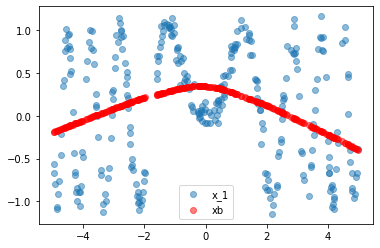

In [97]:
fig, ax = plt.subplots()
# sc = xb_train.plot.scatter(x=['x_1','xb'], y=['y','y'], ax=ax, colormap='winter')
ax.scatter(x=xb_train.x_1, y=xb_train.y, label='x_1', alpha=0.5)
ax.scatter(x=xb_train.x_1, y=xb_train.xb, label='xb', alpha=0.5, color='r')
ax.legend()
plt.show()

In [99]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [100]:
regression_results(y_test,dfpred_test)

explained_variance:  0.0
r2:  -0.0006
MAE:  0.5793
MSE:  0.4449
RMSE:  0.667


In [ ]:
clf.coef_

In [ ]:
clf.intercept_